In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train[0].shape

(28, 28)

In [6]:
# axis=1 -> 행 별로 계산
np.max(x_train[0], axis=1), np.min(x_train[0], axis=1)

(array([  0,   0,   0,  73, 136, 204, 236, 223, 233, 245, 243, 227, 245,
        240, 255, 244, 250, 255, 255, 249, 245, 236, 219, 216, 246,  72,
          0,   0], dtype=uint8),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 29, 67, 48,  0,  0,  0,  0,  0,  0], dtype=uint8))

In [7]:
# 데이터 정규화
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")/255.0

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

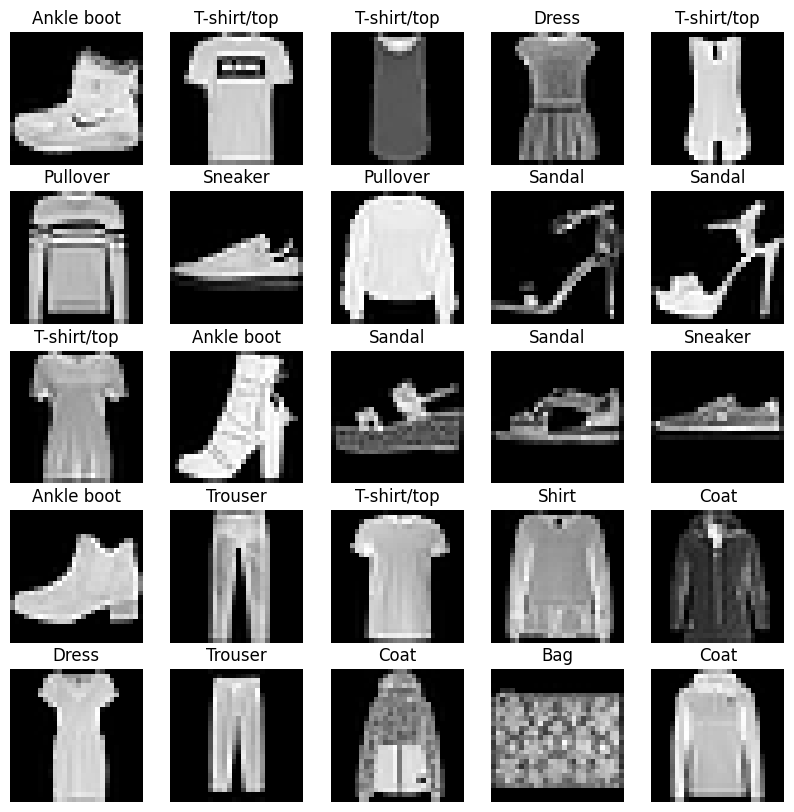

In [24]:
# for문으로 25개 데이터 출력하기
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1),
    plt.grid(False),
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray'),
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [25]:
# 모델1 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(), # 단순심층신경망임, 커널 없이 flatten함
    tf.keras.layers.Dense(128, activation='relu'), # 128개 노드를 갖는 완전연결층, activation은 relu
    tf.keras.layers.Dropout(0.2), # 20% 확률로 노드를 비활성화시킴
    tf.keras.layers.Dense(10, activation='softmax') # 10개 노드를 갖는 완전연결층 : 최종 분류 태그가 10개이기 때문, 분류를 위해 activation은 softmax
])

In [27]:
# 모델1 컴파일
model.compile(
    optimizer='adam',
    # y_true(target) 값이 정수값이므로, 한 가지 정답만이 제공되는 경우에 사용
    # categorical crossentropy: y_ture(target)값이 vector 형태이므로, fuzzy한 경우 사용
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# 모델1 학습
model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8035 - loss: 0.5571 - val_accuracy: 0.8481 - val_loss: 0.4241
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8513 - loss: 0.4113 - val_accuracy: 0.8668 - val_loss: 0.3698
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8631 - loss: 0.3774 - val_accuracy: 0.8699 - val_loss: 0.3578
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3525 - val_accuracy: 0.8683 - val_loss: 0.3599
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3364 - val_accuracy: 0.8747 - val_loss: 0.3424


In [29]:
# 모델1 평가
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8682 - loss: 0.3677


[0.3677256107330322, 0.8682000041007996]

> ##### 2차원 데이터 특성 파악을 위한 합성곱 네트워크를 이용한 모델 생성

In [30]:
# padding='same'을 추가한 모델2 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'), # 32개의 (3, 3) 필터를 사용하여 동일한 크기의 특성맵을 생성. 활성화 함수 relu
    tf.keras.layers.MaxPooling2D((2, 2), strides=2), # (2, 2) max pooling 수행, 특성맵 크기가 (14, 14)로 감소함
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'), # 64개의 (3, 3) 필터를 사용하여 동일한 크기의 특성맵을 생성, 활성화 함수 relu
    tf.keras.layers.MaxPooling2D((2, 2), strides=2), # (2, 2) max pooling 수행, 특성맵 크기가 (7, 7)로 감소함
    tf.keras.layers.Flatten(), # 특성맵을 (7, 7) -> (49, 1) 크기로 정리함
    tf.keras.layers.Dense(128, activation='relu'), # 128개 노드의 완전연결층으로 분류처리, 활성화 함수 relu
    tf.keras.layers.Dense(10, activation='softmax') # 10개 노드의 완전연결층으로 출력, 활성화 함수 softmax
])

In [32]:
# 모델2 컴파일
model_with_conv.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# 모델2 학습
hist2 = model_with_conv.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9468 - loss: 0.1418 - val_accuracy: 0.9152 - val_loss: 0.2332
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9549 - loss: 0.1182 - val_accuracy: 0.9189 - val_loss: 0.2396
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9626 - loss: 0.0998 - val_accuracy: 0.9198 - val_loss: 0.2523
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9712 - loss: 0.0805 - val_accuracy: 0.9202 - val_loss: 0.2768
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9740 - loss: 0.0693 - val_accuracy: 0.9202 - val_loss: 0.2772


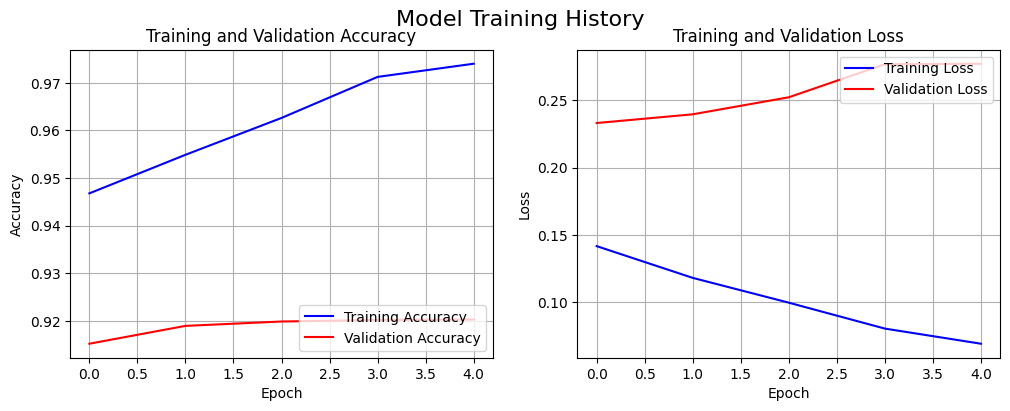

In [39]:
# accuracy & loss 시각화
plt.figure(figsize=(12, 4))

# history 객체에서 훈련 및 검증 데이터를 추출합니다.
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

# 정확도(Accuracy) 그래프
plt.subplot(1, 2, 1)
plt.plot(acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# 손실(Loss) 그래프W
plt.subplot(1, 2, 2)
plt.plot(loss, 'b', label='Training Loss')
plt.plot(val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# 그래프를 화면에 표시합니다.
plt.suptitle('Model Training History', fontsize=16)
plt.show()

In [37]:
# 모델2 평가
model_with_conv.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9144 - loss: 0.3082


[0.30821630358695984, 0.9143999814987183]